<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فرمت مناسب و داده‌های پرت
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش داده‌های عددی و غیرعددی مجموعه‌داده را به فرمت مناسب تبدیل می‌کنیم تا در انجام تحلیل‌ها با چالشی مواجه نشویم. همچنین داده‌های پرت که شامل خانه‌های بسیار گران یا بسیار ارزان هستند و به‌ندرت دیده می‌شوند را حذف خواهیم کرد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا فایل <code>housing_no_missing.csv</code> را که در گام پیشین پروژه به‌دست آمد به‌شکل یک دیتافریم می‌خوانیم.
</font>
</p>

In [1]:
import pandas as pd
import numpy as np

housing_no_missing = pd.read_csv('housing_no_missing.csv', encoding='gbk')

<h1 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فرمت مناسب برای مقادیر دسته‌ای
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تعدادی از ستون‌ها دارای مقادیر دسته‌ای (categorical) هستند. ستون‌هایی مانند آسانسور، جنس ساختمان، شرایط بازسازی و غیره. برای نمایش بهتر داده‌ها این اعداد را به معادل رشته‌ای آن‌ها‌ تبدیل می‌کنیم.
</font>
</p>



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مقادیر ستون‌های <code>elevator</code>، <code>buildingStructure</code>، <code>renovationCondition</code> و <code>subway</code> را مطابق مقادیر زیر تغییر دهید و در یک دیتافریم جدید به نام <code>housing_categorical</code> ذخیره کنید.
</font>
</p>
 
<center>
<table>
<tr>
    <td><b><code>elevator</code></b></td>    
</tr>    
<tr>    
<td>1</td> <td>'has elevator'</td>
</tr>
<tr>     
<td>0</td> <td>'no elevator'</td>    
</tr>
</table>   

<br>       

<table>
<tr>
    <td><b><code>subway</code></b></td>    
</tr>        
<tr>    
<td>1</td> <td>'has subway'</td>
</tr>
<tr>     
<td>0</td> <td>'no subway'</td>    
</tr>        
</table>   
<br>        


<table>
<tr>
<td><b><code>buildingStructure</code></b></td>    
</tr>     
<tr>    
<td>1</td> <td>'unknown'</td>
</tr>
<tr>     
<td>2</td> <td>'mixed'</td>    
</tr>
            
<tr>     
<td>3</td> <td>'brick and wood' </td>    
</tr>
            
<tr>     
<td>4</td> <td>'concrete'</td>    
</tr>
            
<tr>     
<td>5</td> <td>'steel'</td>    
</tr>
            
<tr>     
<td>6</td> <td>'steel-concrete composite'</td>    
</tr>            
</table> 
<br>
        

<table>
<tr>
<td><b><code>renovationCondition</code></b></td>    
</tr>      
<tr>    
<td>1</td> <td>'other'</td>
</tr>
<tr>     
<td>2</td> <td>'rough'</td>    
</tr>
            
<tr>     
<td>3</td> <td>'Simplicity' </td>    
</tr>
            
<tr>     
<td>4</td> <td>'hardcover'</td>    
</tr>
                 
</table>

</center>

In [2]:
housing_no_missing.head()

Lng        Lat   tradeTime     DOM  totalPrice  square  livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00           2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38           2   
2  116.561978  39.877145  2016-12-11  1271.0      1030.0  198.00           3   
3  116.438010  40.076114  2016-09-30   965.0       297.5  134.00           3   
4  116.428392  39.886229  2016-08-28   927.0       392.0   81.00           2   

   drawingRoom  kitchen  bathRoom floor constructionTime  renovationCondition  \
0            1        1         1  高 26             2005                    3   
1            2        1         2  高 22             2004                    4   
2            2        1         3   中 4             2005                    3   
3            1        1         1  底 21             2008                    1   
4            1        1         1   中 6             1960                    2   

   buildingStructure  ladderRatio  elevator  subway  district  
0                  6        0.217       1.0     1.0         7  
1                  6        0.667       1.0     0.0         7  
2                  6        0.500       1.0     0.0         7  
3                  6        0.273       1.0     0.0         6  
4                  2        0.333       0.0     1.0         1

In [3]:
housing_categorical = housing_no_missing.copy()

elevator_mapping = {1: 'has elevator', 0: 'no elevator'}
subway_mapping = {1: 'has subway', 0: 'no subway'}
renovation_mapping = {1: 'other', 2: 'rough', 3: 'Simplicity', 4: 'hardcover'}

def classify_building_structure(structure):
    if structure == 1:
        return 'unknown'
    elif structure == 2:
        return 'mixed'
    elif structure == 3:
        return 'brick and wood'
    elif structure == 4:
        return 'concrete'
    elif structure == 5:
        return 'steel'
    else:
        return 'steel-concrete composite'

housing_categorical['elevator'] = housing_categorical['elevator'].map(elevator_mapping)
housing_categorical['subway'] = housing_categorical['subway'].map(subway_mapping)
housing_categorical['renovationCondition'] = housing_categorical['renovationCondition'].map(renovation_mapping)

housing_categorical["buildingStructure"] = housing_categorical["buildingStructure"].apply(classify_building_structure)

housing_categorical.head()

Lng        Lat   tradeTime     DOM  totalPrice  square  livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00           2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38           2   
2  116.561978  39.877145  2016-12-11  1271.0      1030.0  198.00           3   
3  116.438010  40.076114  2016-09-30   965.0       297.5  134.00           3   
4  116.428392  39.886229  2016-08-28   927.0       392.0   81.00           2   

   drawingRoom  kitchen  bathRoom floor constructionTime renovationCondition  \
0            1        1         1  高 26             2005          Simplicity   
1            2        1         2  高 22             2004           hardcover   
2            2        1         3   中 4             2005          Simplicity   
3            1        1         1  底 21             2008               other   
4            1        1         1   中 6             1960               rough   

          buildingStructure  ladderRatio      elevator      subway  district  
0  steel-concrete composite        0.217  has elevator  has subway         7  
1  steel-concrete composite        0.667  has elevator   no subway         7  
2  steel-concrete composite        0.500  has elevator   no subway         7  
3  steel-concrete composite        0.273  has elevator   no subway         6  
4                     mixed        0.333   no elevator  has subway         1

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بیایید بار دیگر نگاهی به نوع ستون‌ها بیندازیم:
</font>
</p>

In [4]:
housing_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318819 entries, 0 to 318818
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  int64  
 7   drawingRoom          318819 non-null  int64  
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  int64  
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  object 
 13  buildingStructure    318819 non-null  object 
 14  ladderRatio          318819 non-null  float64
 15  elevator         

<h1 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فرمت مناسب برای مقادیر عددی
</font>
</h1>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون‌هایی که مقدار رشته‌ای دارند، از نوع <code>Object</code> هستند. اگر بیشتر دقت کنید، می‌بینید که بعضی از ستون‌های عددی (مانند سال ساخت خانه و ارتفاع خانه) هم به شکل <code>object</code> ذخیره شده‌اند. در قدم بعدی این ستون‌ها را به مقدار عددی تبدیل می‌کنیم.
<br>
بهتر است ابتدا با متد  <code>unique</code>، مقادیر یکتای این ستون‌ها را ببینیم:
</font>
</p>


In [5]:
print('constructionTime : ',housing_categorical.constructionTime.unique())
print('floor : ',housing_categorical.floor.unique())

constructionTime :  ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']
floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低

In [6]:
housing_categorical["constructionTime"].value_counts()

2004    21145
2003    19409
未知      19283
2005    18924
2006    14854
        ...  
1944        2
1934        2
1933        1
1906        1
1914        1
Name: constructionTime, Length: 72, dtype: int64

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نگاهی به مقادیر یکتای ستون <code>constructionTime</code> بیندازید. برای بعضی از خانه‌ها یک عبارت چینی قرار داده‌ شده که به معنی نامشخص (unknown) می‌باشد. تعداد چنین خانه‌هایی کم است، پس می‌توانیم خانه‌هایی که سال ساخت آن‌ها نامشخص است را حذف کنیم (البته شاید بهتر باشد که به جای حذف این خانه‌ها، میانگین سال ساخت یا مد سال ساخت را قرار داد. انتخاب رویکرد مناسب برای مقادیر گم‌شده یا نامشخص به ماهیت مسئله و نیازهای ما بستگی دارد).
<br>
در این قسمت خانه‌هایی که سال ساخت آن‌ها مشخص نیست را حذف کرده و پس از آن نوع ستون <code>constructionTime</code> را به <code>int</code> تغییر دهید. نام دیتا‌فریم جدید را برابر <code>housing_construction</code> قرار دهید.
</font>
</p>

In [7]:
housing_construction = housing_categorical.copy()

housing_construction = housing_construction[housing_construction["constructionTime"] != '未知']
housing_construction["constructionTime"] = housing_construction["constructionTime"].astype(int)

housing_construction.head()

Lng        Lat   tradeTime     DOM  totalPrice  square  livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00           2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38           2   
2  116.561978  39.877145  2016-12-11  1271.0      1030.0  198.00           3   
3  116.438010  40.076114  2016-09-30   965.0       297.5  134.00           3   
4  116.428392  39.886229  2016-08-28   927.0       392.0   81.00           2   

   drawingRoom  kitchen  bathRoom floor  constructionTime renovationCondition  \
0            1        1         1  高 26              2005          Simplicity   
1            2        1         2  高 22              2004           hardcover   
2            2        1         3   中 4              2005          Simplicity   
3            1        1         1  底 21              2008               other   
4            1        1         1   中 6              1960               rough   

          buildingStructure  ladderRatio      elevator      subway  district  
0  steel-concrete composite        0.217  has elevator  has subway         7  
1  steel-concrete composite        0.667  has elevator   no subway         7  
2  steel-concrete composite        0.500  has elevator   no subway         7  
3  steel-concrete composite        0.273  has elevator   no subway         6  
4                     mixed        0.333   no elevator  has subway         1

In [8]:
housing_construction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299536 entries, 0 to 318817
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  int64  
 7   drawingRoom          299536 non-null  int64  
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  int64  
 10  floor                299536 non-null  object 
 11  constructionTime     299536 non-null  int32  
 12  renovationCondition  299536 non-null  object 
 13  buildingStructure    299536 non-null  object 
 14  ladderRatio          299536 non-null  float64
 15  elevator         

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا می‌رویم سراغ ستون <code>floor</code> که داستانش کمی متفاوت است. در خانه‌های این ستون ابتدا یک کلمه‌ی چینی و پس از آن یک عدد قرار گرفته است. عدد بعد از کاراکتر چینی ارتفاع خانه را نشان می‌دهد. پس از کمک گرفتن از مترجم گوگل، متوجه شدیم که آن کلمات، معادل بالا و پایین و متوسط هستند. می‌توان این ستون را به دو ستون متفاوت تبدیل کرد ولی ما اینجا عبارات چینی را دور می‌ریزیم و فقط اعداد را نگه می‌داریم.
<br>
ستون <code>floor</code> را طوری تغییر دهید که فقط اعداد آن‌ها باقی بماند و نوع داده‌های ستون <code>floor</code> را با استفاده از توابع پانداز به <code>int</code> تبدیل کنید. نام دیتافریم جدید را برابر <code>housing_floor</code> قرار دهید. 
</font>
</p>


In [9]:
housing_floor = housing_construction.copy()

def get_number(string):
    num_str = ""
    idx = len(string) - 1
    while string[idx].isnumeric():
        num_str = string[idx] + num_str
        idx -= 1
    return num_str

housing_floor["floor"] = housing_floor["floor"].apply(get_number).astype(int)

housing_floor.head()

Lng        Lat   tradeTime     DOM  totalPrice  square  livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00           2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38           2   
2  116.561978  39.877145  2016-12-11  1271.0      1030.0  198.00           3   
3  116.438010  40.076114  2016-09-30   965.0       297.5  134.00           3   
4  116.428392  39.886229  2016-08-28   927.0       392.0   81.00           2   

   drawingRoom  kitchen  bathRoom  floor  constructionTime  \
0            1        1         1     26              2005   
1            2        1         2     22              2004   
2            2        1         3      4              2005   
3            1        1         1     21              2008   
4            1        1         1      6              1960   

  renovationCondition         buildingStructure  ladderRatio      elevator  \
0          Simplicity  steel-concrete composite        0.217  has elevator   
1           hardcover  steel-concrete composite        0.667  has elevator   
2          Simplicity  steel-concrete composite        0.500  has elevator   
3               other  steel-concrete composite        0.273  has elevator   
4               rough                     mixed        0.333   no elevator   

       subway  district  
0  has subway         7  
1   no subway         7  
2   no subway         7  
3   no subway         6  
4  has subway         1

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اگر مراحل را به‌درستی انجام داده باشید، باید نوع ستون‌ها به شکل زیر باشد:
</font>
</p>


In [10]:
housing_floor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299536 entries, 0 to 318817
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  int64  
 7   drawingRoom          299536 non-null  int64  
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  int64  
 10  floor                299536 non-null  int32  
 11  constructionTime     299536 non-null  int32  
 12  renovationCondition  299536 non-null  object 
 13  buildingStructure    299536 non-null  object 
 14  ladderRatio          299536 non-null  float64
 15  elevator         

<h1 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
داده‌های پرت
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ممکن است خانه‌هایی بسیار بزرگ یا بسیار گران باشند یا برعکس، خانه‌‌هایی باشند که بیش از حد ارزان یا کوچک بوده و فاصله‌ی بسیاری با میانگین داشته‌ باشند. در بعضی امور تحلیل داده‌ای، داده‌ی پرت می‌تواند نتایج را به شکلی نامطلوب تغییر دهد. برای مثال، نمودار‌ها به شکلی نامفهوم در می‌آیند یا در کارهای یادگیری ماشین، این داده‌ها ممکن است الگوریتم را به اشتباه بیندازند. در این قسمت بعضی از خانه‌هایی که یک یا چند ویژگی پرت یا غیرمعمول دارند را حذف می‌کنیم.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
یکی از بهترین روش‌های شناسایی و حذف داده‌های پرت، استفاده از چارک‌ها و نمودار جعبه‌ای می‌باشد. 
پس ابتدا نمودار جعبه‌ای ستون قیمت را رسم می‌کنیم.
</font>
</p>

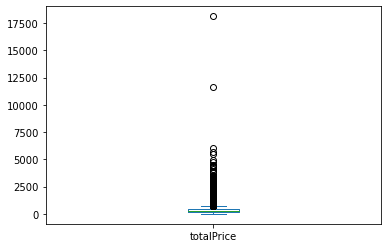

In [11]:
housing_floor.totalPrice.plot(kind = 'box');

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بعضی از داده‌ها آن‌قدر پرت هستند که نمودار جعبه‌ای از حالت جعبه خارج شده است! نقاطی که در بالای نمودار هستند، داده‌های بسیار پرت می‌باشند.
<br>
با موضوع حذف داده‌های پرت در درسنامه‌ی «حذف داده‌ها»  آشنا شدید. برای حذف مقادیر پرت به‌کمک این تکنیک، از چارک اول و سوم برای انتخاب ناحیه‌ی مناسب استفاده می‌کنیم.  این ناحیه که <code>IQR</code> نام دارد، اختلاف چارک اول و سوم می‌باشد. سپس عددی در <code>IQR</code> ضرب می‌شود و مقادیری که کمتر یا بیشتر از این ناحیه جدید هستند، حذف می‌شوند. معمولاً این فاکتور (عددی که در <code>IQR</code> ضرب می‌شود) را برابر ۱.۵ در نظر می‌گیرند و از فاکتور ۳ برای شناسایی داده‌های خیلی پرت استفاده می‌شود.در ادامه از فاکتور ۱.۵ استفاده خواهیم کرد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت چهارم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
خانه‌هایی که قیمت کلی آنها در محدوده‌ی ۱.۵ برابری فاصله‌ی میان‌چارکی قرار نمی‌گیرد را حذف کنید و حاصل کار (داده‌های باقیمانده) را در دیتافریم <code>housing_no_outlier</code> قرار دهید. اگر مراحل را درست انجام داده باشید باید ۱۴۴۹۶ خانه حذف شوند.
</font>
</p>


In [12]:
q1,q3 = np.percentile(housing_floor["totalPrice"], [25,75])
iqr = q3 - q1

housing_no_outlier = housing_floor[(housing_floor["totalPrice"] > q1 - 1.5 * iqr) & (housing_floor["totalPrice"] < q3 + 1.5 * iqr)]

print('Number of removed outliers : ', housing_floor.shape[0] - housing_no_outlier.shape[0])

Number of removed outliers :  14496


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نگاهی هم به نمودار میله‌ای ستون <code>totalPrice</code> بیندازیم. همان‌طور که می‌بینید، نمودار حالتی طبیعی‌تر به خود گرفته است:
</font>
</p>

<Axes: >

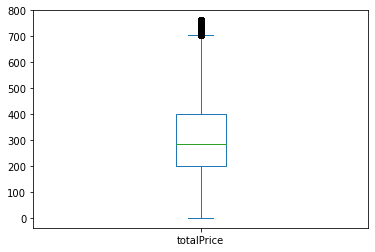

In [13]:
housing_no_outlier.totalPrice.plot(kind = 'box')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریم حاصل از این گام را برای استفاده در گام بعدی پروژه ذخیره می‌کنیم.
</font>
</p>

In [14]:
housing_no_outlier.shape

(285040, 18)

In [15]:
housing_no_outlier.to_csv('housing_no_outlier.csv', encoding='gbk', index=False)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [16]:
import zipfile
import joblib

housing_categorical.to_csv("housing_categorical.csv") 
housing_construction.to_csv("housing_construction.csv")
housing_floor.to_csv("housing_floor.csv")
housing_no_outlier.to_csv("housing_no_outlier.csv")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["housing_categorical.csv", "housing_construction.csv", "housing_floor.csv",
              "housing_no_outlier.csv", "2_correct_format_and_outliers.ipynb"]
compress(file_names)

File Paths:
['housing_categorical.csv', 'housing_construction.csv', 'housing_floor.csv', 'housing_no_outlier.csv', '2_correct_format_and_outliers.ipynb']
